# box plots generated in main figure 2 based on macaque cell counts - RNAscope

In [1]:
library(pzfx)
library(here)
library("stringr")
library(ggpubr)
library(rstatix)
library(grid)

Warning message:
“package ‘here’ was built under R version 4.1.3”
here() starts at /projects/pfenninggroup/singleCell/Macaque_SealDorsalHorn_snATAC-seq

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
path = here("data/tidy_data/tables/cell_counts_per_animal.pzfx")
pzfx_tables(path)

[1] "GLUT1"            "GLUT2"            "GLUT3"            "GLUT4"           
 [5] "GLUT5"            "GLUT6"            "GLUT7"            "GLUT8"           
 [9] "GLUT9"            "GLUT10"           "GLUT11"           "GABA1"           
[13] "GABA2"            "GABA3"            "GABA4"            "GABA5"           
[17] "GLUT1 Pie Chart"  "GLUT2 Pie Chart"  "GLUT3 Pie Chart"  "GLUT4 Pie Chart" 
[21] "GLUT5 Pie Chart"  "GLUT6 Pie Chart"  "GLUT7 Pie Chart"  "GLUT8 Pie Chart" 
[25] "GLUT9 Pie Chart"  "GLUT10 Pie Chart" "GLUT11 Pie Chart" "GABA1 Pie Chart" 
[29] "GABA2 Pie Chart"  "GABA3 Pie Chart"  "GABA4 Pie Chart"  "GABA5 Pie Chart"

In [5]:
# create table with all cell types and laminar data
for (ii in 1:length(pzfx_tables(path))){
    
    # ignore pie chart data
    if (!grepl( 'Pie Chart', pzfx_tables(path)[ii])){
    
    df <- read_pzfx(path, table=ii)
    df['celltype'] <- pzfx_tables(path)[ii]
    
    if (ii == 1){
        dfs <- df
    } else {
        dfs <- rbind(dfs,df)
        #print(head(df))
    }
        
    }
}
dfs['I_II'] <- dfs['I-II']
dfs['III_V'] <- dfs['III-V']
dfs['celltype'] = as.factor(dfs$celltype)

In [6]:


dfs1 <- dfs
dfs1['counts'] = dfs['I_II']
dfs1['lamina'] = 'I_II'
dfs1['celltype_lamina'] = paste0(dfs1$celltype,dfs1$lamina)
dfs1 = dfs1[c('celltype_lamina','celltype','counts','lamina')]
dfs1 = dfs1[order(dfs1$celltype_lamina),]

dfs2 <- dfs
dfs2['counts'] = dfs['III_V']
dfs2['lamina'] = 'III_V'
dfs2['celltype_lamina'] = paste0(dfs2$celltype,dfs2$lamina)
dfs2 = dfs2[c('celltype_lamina','celltype','counts','lamina')]


dfs_bylamina = rbind(dfs1,dfs2)
dfs_bylamina = dfs_bylamina[order(dfs_bylamina$celltype_lamina),]

### change lamina name
dfs_bylamina[dfs_bylamina == "I_II"] <- "I-II"
dfs_bylamina[dfs_bylamina == "III_V"] <- "III-V"

laminar_gaba = dfs_bylamina[str_detect(dfs_bylamina$celltype,'GABA'),]
laminar_glut = dfs_bylamina[str_detect(dfs_bylamina$celltype,'GLUT'),]


In [5]:
laminar_gaba

,celltype_lamina,celltype,counts,lamina
,<chr>,<fct>,<dbl>,<chr>
66,GABA1I_II,GABA1,1,I-II
67,GABA1I_II,GABA1,4,I-II
68,GABA1I_II,GABA1,0,I-II
69,GABA1I_II,GABA1,2,I-II
70,GABA1I_II,GABA1,5,I-II
71,GABA1I_II,GABA1,3,I-II
661,GABA1III_V,GABA1,18,III-V
671,GABA1III_V,GABA1,38,III-V
681,GABA1III_V,GABA1,25,III-V


png 
  2

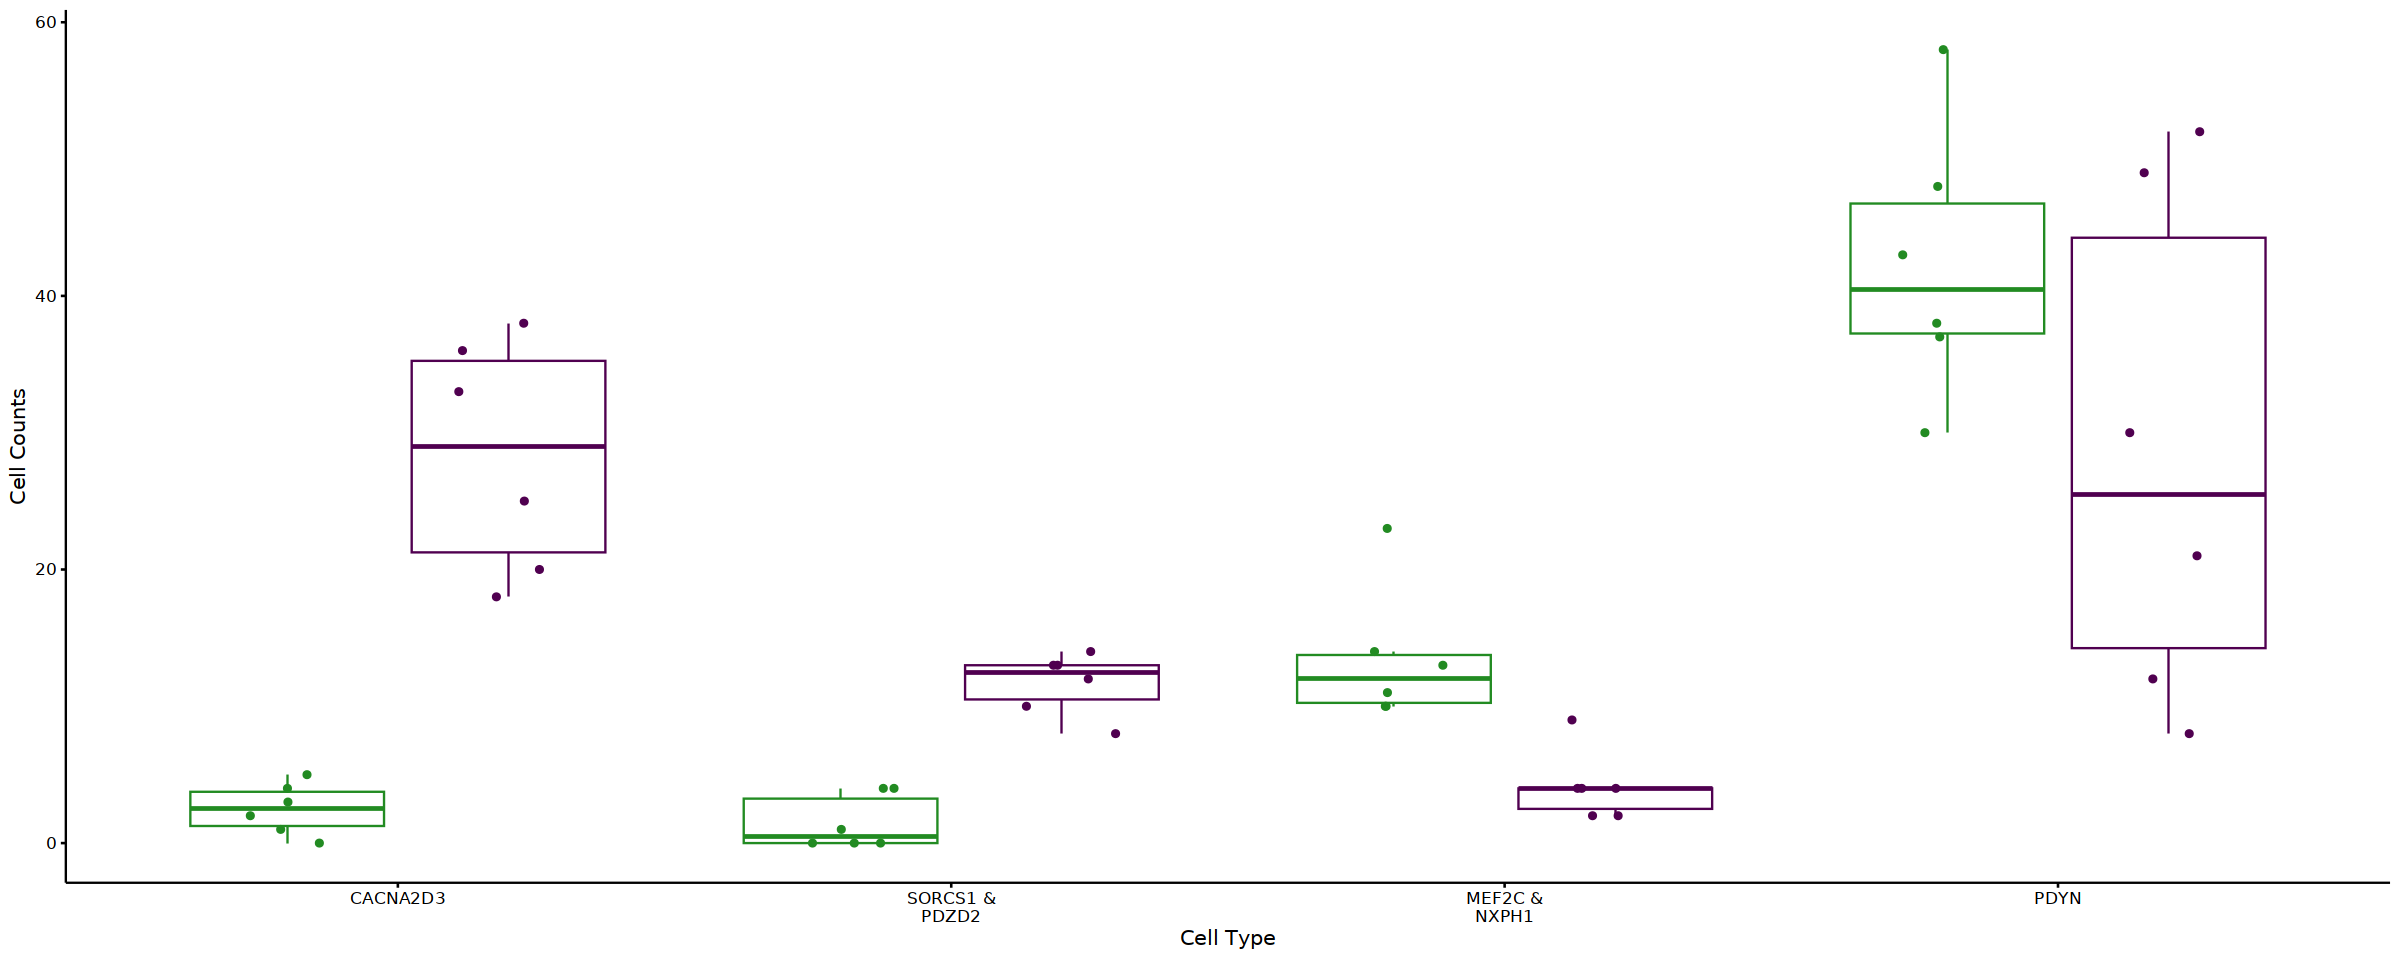

In [66]:
## ggpubr way
#"npg", "aaas", "lancet", "jco", "ucscgb", "uchicago", "simpsons" and "rickandmorty"
options(repr.plot.width=20, repr.plot.height=8)
laminar_gaba_rest <- laminar_gaba[laminar_gaba$celltype != 'GABA3',]

gaba_ordered = c('CACNA2D3', 'SORCS1 &\nPDZD2', 'MEF2C &\nNXPH1','PDYN')

p <- ggboxplot(laminar_gaba_rest, x = "celltype", y = "counts", size = 0.5,
          color = "lamina", palette = get_palette(c("#228B22", "#500050"),2),
          add = "jitter") +
theme(text = element_text(size=10),
  axis.text.x = element_text(angle = 0,vjust = 1, hjust=.5), axis.title=element_text(size=12,face="bold"),
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"),
     legend.position = 'none', legend.text = element_text(size=12)  ) +
    xlab("Cell Type") + ylab("Cell Counts") + 
scale_x_discrete(labels = gaba_ordered)

# stat.test <- laminar_gaba %>%
#   group_by(celltype) %>%
#   wilcox_test(counts ~ lamina) %>%
# #  adjust_pvalue(method = "bonferroni") %>%
# #  add_significance("p.adj")
#  add_significance("p")
# stat.test
# stat.test <- stat.test %>%
#   add_xy_position(x = "celltype", dodge = 0.8)



pdf(here(paste0("figures/exploratory/arokiaraj_paper/gaba_",Sys.Date(),".pdf")), width=4, height=2.5)
print(p)
dev.off()

pstat <- p + stat_compare_means(aes(group = lamina),label = "p.signif", size = 5)
print(pstat)

Warning message:
“Duplicated aesthetics after name standardisation: size”


png 
  2

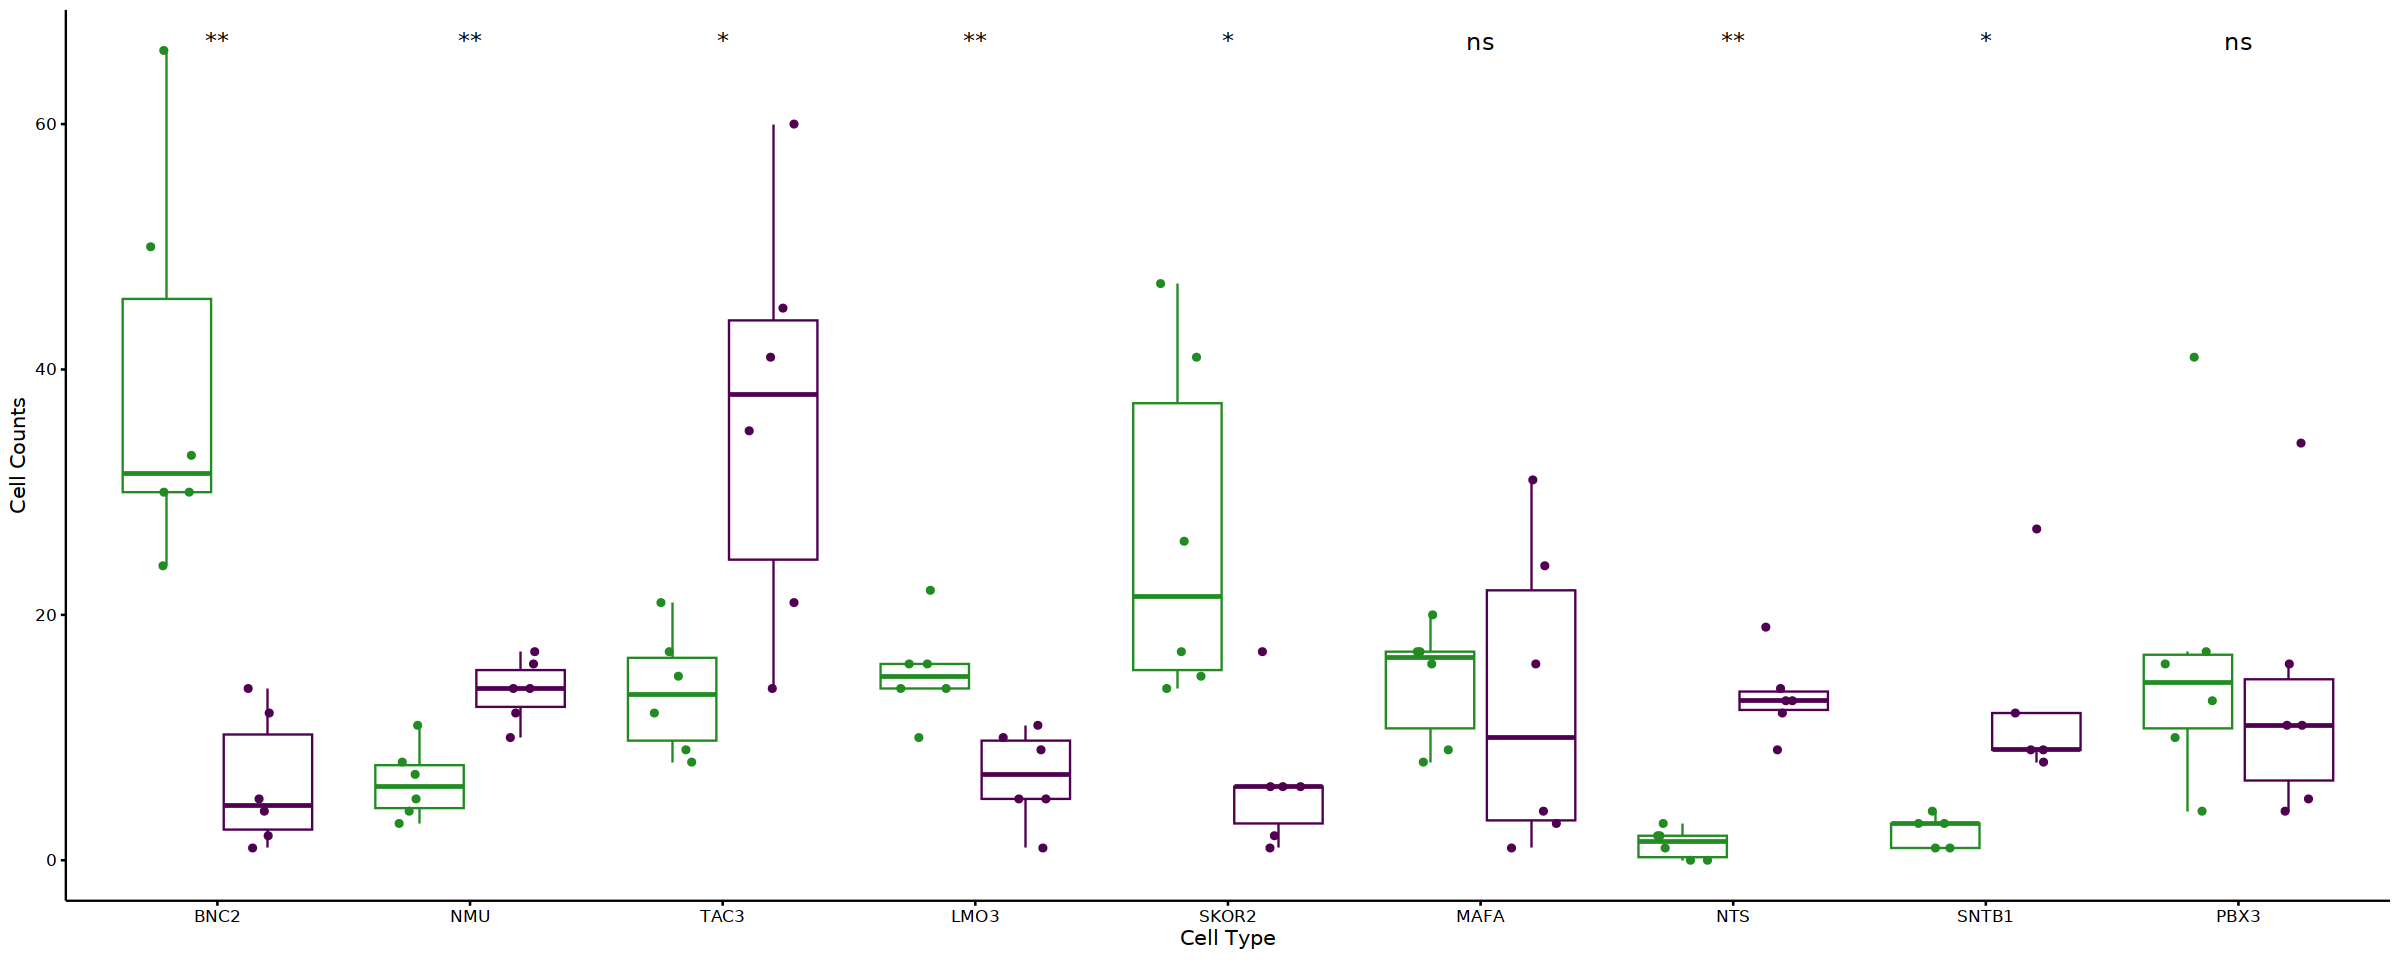

In [73]:

options(repr.plot.width=20, repr.plot.height=8)
laminar_glut_rest <- laminar_glut[laminar_glut$celltype != 'GLUT7' & laminar_glut$celltype != 'GLUT2',]

glut_ordered = c('GLUT1','GLUT3','GLUT4','GLUT5','GLUT6','GLUT8','GLUT9','GLUT10','GLUT11')
new_cell_nicknames = c('BNC2','NMU', 'TAC3','LMO3', 'SKOR2', 'MAFA', 
                  'NTS', 'SNTB1', 'PBX3')
names(new_cell_nicknames) = glut_ordered

#glut_ordered = c('GLUT1','GLUT2','GLUT3','GLUT4','GLUT5','GLUT6','GLUT7','GLUT8','GLUT9','GLUT10','GLUT11')
laminar_glut_rest$celltype = factor(laminar_glut_rest$celltype, levels = glut_ordered)

p <- ggboxplot(laminar_glut_rest, x = "celltype", y = "counts", size = 0.5,
          color = "lamina", palette = get_palette(c("#228B22", "#500050"),2),
          add = "jitter", lwd=.75) +
theme(text = element_text(size=10),
  axis.text.x = element_text(angle = 0,vjust = 1, hjust= 0.5), axis.title=element_text(size=12,face="bold"),
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"),
     legend.position = 'none', legend.text = element_text(size=10)  ) +
    xlab("Cell Type") + ylab("Cell Counts") +
    scale_x_discrete(labels = new_cell_nicknames)

pstat <- p #+ stat_compare_means(aes(group = lamina),label = "p.signif", size = 5)

pdf(here(paste0("figures/exploratory/arokiaraj_paper/glut_rest_",Sys.Date(),".pdf")), width=7.5, height=2.5)
print(pstat)
dev.off()

pstat <- p + stat_compare_means(aes(group = lamina),label = "p.signif", size = 5)
print(pstat)

png 
  2

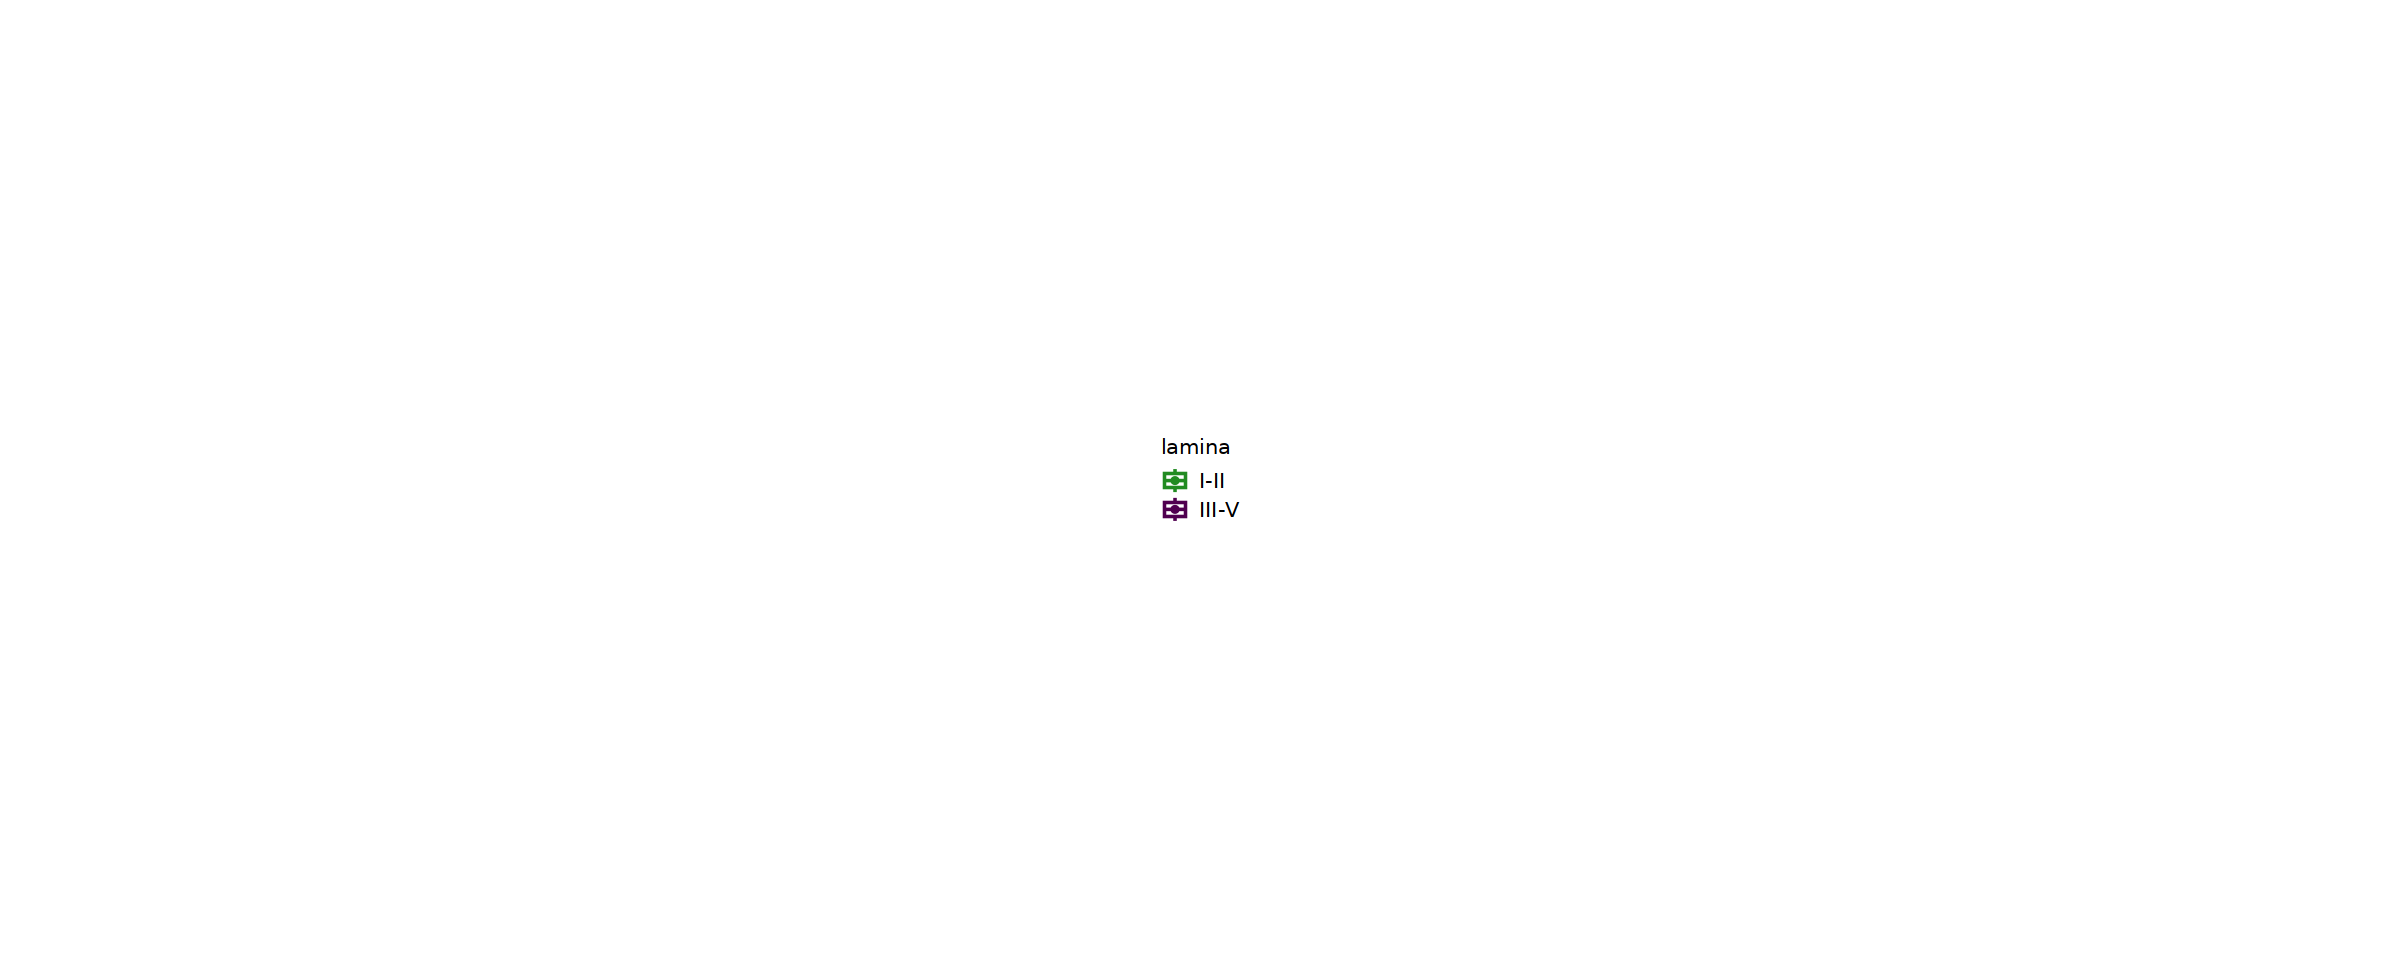

In [19]:
# Just legend

ptmp <- ggboxplot(laminar_glut, x = "celltype", y = "counts",
          color = "lamina", palette = get_palette(c("#228B22", "#500050"),2),
          add = "jitter", lwd=.75) +
theme(text = element_text(size=12),
     legend.position = c(.5,.5), legend.text = element_text(size=12)  ) +
    xlab("Cell Type") + ylab("Cell Counts")

leg <- get_legend(ptmp)

# Convert to a ggplot and print
pdf(here(paste0("figures/exploratory/arokiaraj_paper/lamina_just_legend_",Sys.Date(),".pdf")), width=7.5, height=4)
as_ggplot(leg)
dev.off()

as_ggplot(leg)

png 
  2

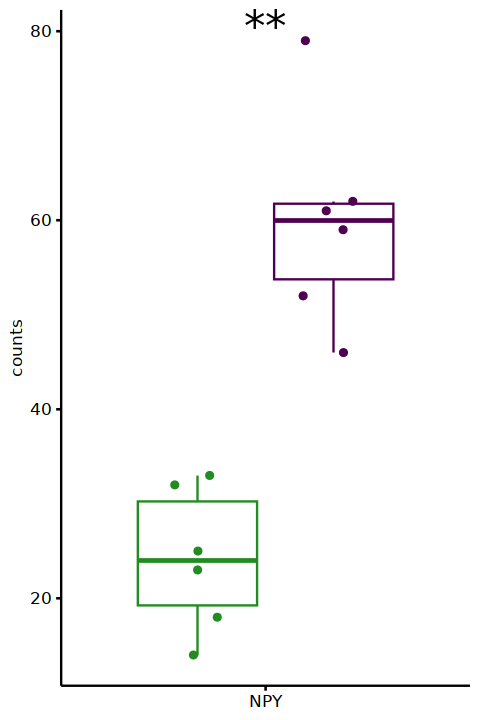

In [69]:
laminar_gaba3 <- laminar_gaba[laminar_gaba$celltype == 'GABA3',]

p <- ggboxplot(laminar_gaba3, x = "celltype", y = "counts", size = 0.5,
          color = "lamina", palette=get_palette(c("#228B22", "#500050"),2),
          add = "jitter") +
theme(text = element_text(size=10),
  axis.text.x = element_text(angle = 0,vjust = 1, hjust=.5), axis.title.x=element_blank(),
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"),
     legend.position = "none", legend.text = element_text(size=10)) +
    scale_x_discrete(labels = c('NPY'))

pstat <- p + stat_compare_means(aes(group = lamina),label = "p.signif", size = 9)

pdf(here(paste0("figures/exploratory/arokiaraj_paper/gaba3_",Sys.Date(),".pdf")), width=1.5, height=2)
print(pstat)
dev.off()

print(pstat)

In [70]:
laminar_glut7 <- laminar_glut[laminar_glut$celltype == 'GLUT7',]

p <- ggboxplot(laminar_glut7, x = "celltype", y = "counts", size = 0.5,
          color = "lamina", palette=get_palette(c("#228B22", "#500050"),2),
          add = "jitter") +
theme(text = element_text(size=10),
  axis.text.x = element_text(angle = 0,vjust = 1, hjust=.5), axis.title.x=element_blank(),
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"),
     legend.position = "none", legend.text = element_text(size=10)) +
scale_x_discrete(labels = c('MAF'))

pstat <- p + stat_compare_means(aes(group = lamina),label = "p.signif", size = 9)

pdf(here(paste0("figures/exploratory/arokiaraj_paper/glut7_",Sys.Date(),".pdf")), width=1.5, height=2)
print(pstat)
dev.off()

png 
  2

In [72]:
my_colors = c("#228B22", "#500050")

options(repr.plot.width=4, repr.plot.height=6)

laminar_glut2 <- laminar_glut[laminar_glut$celltype == 'GLUT2',]

p <- ggboxplot(laminar_glut2, x = "celltype", y = "counts", size = .5,
          color = "lamina", palette=get_palette(my_colors,2),
          add = "jitter") +
theme(text = element_text(size=10),
  axis.text.x = element_text(angle = 0,vjust = 1, hjust=.5), axis.title.x=element_blank(),
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"),
      legend.position = "none", legend.text = element_text(size=10)) +
scale_x_discrete(labels = c('NMUR2'))

pstat <- p #+ stat_compare_means(aes(group = lamina), label = "p.signif")

pdf(here(paste0("figures/exploratory/arokiaraj_paper/glut2_",Sys.Date(),".pdf")), width=1.5, height=2)
print(pstat)
dev.off()
#ggpar(p, legend = "bottom")

png 
  2